# <center>Bad Bank Behavior<br>Analyzing Bank Mortgage during the 2007 Housing Bubble</center>  

<center>Michael Siebel</center>
<center>August 2020</center>
<br>
    
## <center>Data Wrangling Script</center>

# Purpose
<br>

> ETL data from: <br>
1) Fannie Mae Loan Acquistion and Performance Data [Individual Mortgage Loans], <br>
2) Past Fannie Mae Loan Acquistion Data [Changes in Loan Amounts], <br>
3) U.S. Census Bureau, Small Area Estimates Branch [Median Household Income by County], <br>
4) Federal Reserve Economic Data (FRED) [Macroeconomic Data related to the Housing Market], <br>
5) Federal Deposit Insurance Corporation (FDIC) Data [Information on FDIC-backed Banks]

***

# Load Functions

In [1]:
%run Functions.ipynb
pd.set_option("display.max_columns", 200)
pd.set_option('display.max_rows', 200)

Using TensorFlow backend.


***

# Load Fannie Mae Data

In [2]:
# Import packages
import os
import glob

# Collect file names
fld = '..\Data\\'
x = []
for file in os.listdir(fld):
    filename = os.fsdecode(file)
    if filename.startswith("Acq_200"): 
        x.append(fld + filename)

# Load data
df = pd.DataFrame()
for i in range(len(x)):
    acq = load_data(x[i])
    
    # Drop NA values in Original Date
    acq = acq.loc[acq['Original Date'].notna(),:]
    
    acq['File Year'] = int(x[i][12:16])
    acq['File Quarter'] = x[i][16:18]
    
    acq['Original Date'] = acq['Original Date'].astype(float).astype(int).astype(str)
    acq['Original Date'] = acq['Original Date'].apply(lambda x: x.zfill(6))
    acq['Month'] = acq['Original Date'].apply(lambda x: x[0:2])
    acq['Year'] = acq['Original Date'].apply(lambda x: x[2:6]).astype(int)
    acq['Original Date'] = (acq['Original Date'].apply(lambda x: x[0:2]) + '/' + 
                           acq['Original Date'].apply(lambda x: x[2:6])).apply(str)
    
    acq = acq.drop(labels=['Servicer', 'Master Servicer'], axis=1)

    acq = acq.loc[acq['File Year'] <= 2008,:]
    df = pd.concat([df, acq], ignore_index=True)
    print('..Loaded year', x[i][12:16], 'quarter', x[i][16:18])

..Loaded year 2001 quarter Q1
..Loaded year 2001 quarter Q2
..Loaded year 2001 quarter Q3
..Loaded year 2001 quarter Q4
..Loaded year 2002 quarter Q1
..Loaded year 2002 quarter Q2
..Loaded year 2002 quarter Q3
..Loaded year 2002 quarter Q4
..Loaded year 2003 quarter Q1
..Loaded year 2003 quarter Q2
..Loaded year 2003 quarter Q3
..Loaded year 2003 quarter Q4
..Loaded year 2004 quarter Q1
..Loaded year 2004 quarter Q2
..Loaded year 2004 quarter Q3
..Loaded year 2004 quarter Q4
..Loaded year 2005 quarter Q1
..Loaded year 2005 quarter Q2
..Loaded year 2005 quarter Q3
..Loaded year 2005 quarter Q4
..Loaded year 2006 quarter Q1
..Loaded year 2006 quarter Q2
..Loaded year 2006 quarter Q3
..Loaded year 2006 quarter Q4
..Loaded year 2007 quarter Q1
..Loaded year 2007 quarter Q2
..Loaded year 2007 quarter Q3
..Loaded year 2007 quarter Q4
..Loaded year 2008 quarter Q1
..Loaded year 2008 quarter Q2
..Loaded year 2008 quarter Q3
..Loaded year 2008 quarter Q4


***

# Drop Unnecessary Observations

In [3]:
# Drop U.S. Terroritories due to missing data
df = df[df['Property State'] != 'PR']
df = df[df['Property State'] != 'GU']
df = df[df['Property State'] != 'VI']

df.head(10)

,Loan ID,Reported Period,Origination Channel,Lender,Original Interest Rate,Original Mortgage Amount,Original Loan Term,Original Date,First Payment,Original Loan-to-Value (LTV),Original Combined Loan-to-Value (CLTV),Number of Borrowers,Original Debt to Income Ratio,Credit Score,Co-Borrower Credit Score,First Time Home Buyer,Loan Purpose,Property Type,Number of Units,Occupancy Type,Property State,Zip Code,Mortgage Insurance %,Zero Balance Code,Mortgage Insurance Type,Relocation Mortgage Indicator,Foreclosed,File Year,File Quarter,Month,Year
0,1.000051e+11,122001,R,Other,8.000,125000.0,360.0,11/2000,12001.0,95.0,95.0,1.0,29.0,694.0,NaN,N,P,SF,1.0,P,MI,492.0,30.0,0,1.0,N,0,2001,Q1,11,2000
1,1.000069e+11,92003,C,"Flagstar Bank, Fsb",7.875,99000.0,360.0,12/2000,22001.0,80.0,80.0,1.0,55.0,689.0,NaN,N,C,SF,1.0,P,CA,923.0,NaN,0,NaN,N,0,2001,Q1,12,2000
2,1.000103e+11,122002,R,"Jpmorgan Chase Bank, Na",7.625,140000.0,360.0,12/2000,22001.0,21.0,21.0,1.0,12.0,796.0,NaN,N,R,SF,1.0,P,CO,803.0,NaN,0,NaN,N,0,2001,Q1,12,2000
3,1.000157e+11,32002,B,"Flagstar Bank, Fsb",7.625,102000.0,360.0,03/2001,52001.0,80.0,80.0,2.0,32.0,706.0,661.0,N,C,SF,1.0,P,WI,541.0,NaN,0,NaN,N,0,2001,Q1,03,2001
4,1.000208e+11,42003,R,Other,7.125,214000.0,360.0,01/2001,32001.0,80.0,80.0,1.0,43.0,731.0,NaN,N,P,SF,4.0,P,IL,604.0,NaN,0,NaN,N,0,2001,Q1,01,2001
5,1.000273e+11,82002,R,Other,8.000,195000.0,360.0,12/2000,22001.0,74.0,74.0,2.0,42.0,720.0,696.0,N,C,SF,1.0,P,VA,236.0,NaN,0,NaN,N,0,2001,Q1,12,2000
6,1.000375e+11,52002,R,"Bank Of America, N.A.",7.750,228000.0,360.0,12/2000,22001.0,95.0,95.0,2.0,38.0,642.0,664.0,N,P,SF,1.0,P,AL,352.0,30.0,0,2.0,N,0,2001,Q1,12,2000
7,1.000408e+11,112003,C,"Citimortgage, Inc.",7.000,145000.0,360.0,01/2001,32001.0,71.0,71.0,2.0,20.0,752.0,786.0,N,P,SF,1.0,P,CA,953.0,NaN,0,NaN,N,0,2001,Q1,01,2001
8,1.000412e+11,32003,R,Fleet National Bank,7.875,150000.0,240.0,10/2000,122000.0,85.0,85.0,2.0,34.0,734.0,NaN,N,C,SF,1.0,P,CO,810.0,6.0,0,1.0,N,0,2001,Q1,10,2000
9,1.000434e+11,112002,R,"Jpmorgan Chase Bank, Na",6.875,275000.0,240.0,12/2000,22001.0,71.0,71.0,1.0,41.0,765.0,NaN,N,P,PU,1.0,P,VA,201.0,NaN,0,NaN,N,0,2001,Q1,12,2000


In [4]:
# Dates
## Pre-file date values indicate a mortgage loan refinnanced during the date value
df['Original Date'].value_counts()

04/2003    599025
03/2003    523577
10/2002    512087
12/2002    496546
11/2002    486293
            ...  
04/2000       581
02/2000       533
11/1999       531
10/1999       459
09/1999       458
Name: Original Date, Length: 120, dtype: int64

***

# Fannie Mae Feature Recodes

In [5]:
# Co-Borrower Credit Score
df['Harmonized Credit Score'] = ( df.loc[df['Co-Borrower Credit Score'].notnull(), 'Co-Borrower Credit Score'] * 0.5 ) \
                                  + ( df['Credit Score'].loc[df['Co-Borrower Credit Score'].notnull()] * 0.5 ) 
df.loc[df['Co-Borrower Credit Score'].isnull(), 'Harmonized Credit Score'] = \
                    df.loc[df['Co-Borrower Credit Score'].isnull(), 'Credit Score']  
df.loc[df['Harmonized Credit Score'].isnull(), 'Harmonized Credit Score'] = \
                    df.loc[df['Harmonized Credit Score'].isnull(), 'Credit Score'] 

print(df[['Harmonized Credit Score', 'Credit Score', 'Co-Borrower Credit Score']].head(10))
df = df.drop(labels=['Credit Score', 'Co-Borrower Credit Score'], axis=1)
df = df.rename(columns={'Harmonized Credit Score': 'Credit Score'})

   Harmonized Credit Score  Credit Score  Co-Borrower Credit Score
0                    694.0         694.0                       NaN
1                    689.0         689.0                       NaN
2                    796.0         796.0                       NaN
3                    683.5         706.0                     661.0
4                    731.0         731.0                       NaN
5                    708.0         720.0                     696.0
6                    653.0         642.0                     664.0
7                    769.0         752.0                     786.0
8                    734.0         734.0                       NaN
9                    765.0         765.0                       NaN


In [6]:
# Mortgage Insurance %
df['Mortgage Insurance %'] = np.where(df['Mortgage Insurance %'].isna(), \
                                      0, df['Mortgage Insurance %'])
df['Mortgage Insurance Type'] = np.where(df['Mortgage Insurance %']==0, \
                                         1, 0)
df['Mortgage Insurance Type'].value_counts()

1    15661119
0     3037805
Name: Mortgage Insurance Type, dtype: int64

In [7]:
# Collapse Refinance
print('Original Distribution')
print(df['Loan Purpose'].value_counts())
df['Loan Purpose'] = np.where(df['Loan Purpose'] != 'P', \
                              1, 0)
print('')
print('New Distribution')
print(df['Loan Purpose'].value_counts())

Original Distribution
C    6616638
R    6552849
P    5516324
U      13113
Name: Loan Purpose, dtype: int64
New Distribution
1    13182600
0     5516324
Name: Loan Purpose, dtype: int64


In [8]:
# Recode Number of Borrowers
## Single Borrower binary
## More than one borrower is 0
print('Original Distribution')
print(df['Number of Borrowers'].value_counts())
df['Number of Borrowers'] = np.where(df['Number of Borrowers'] == 1, \
                                     1, 0)
print('')
print('New Distribution')
df = df.rename(columns={'Number of Borrowers': 'Single Borrower'})
df['Single Borrower'].value_counts()

Original Distribution
2.0     11347332
1.0      7247376
3.0        69802
4.0        25974
5.0          510
6.0          395
8.0           67
7.0           60
10.0          20
9.0           10
Name: Number of Borrowers, dtype: int64


0    11451548
1     7247376
Name: Single Borrower, dtype: int64

***

# Group Banks

Goal is to keep bank values ~10,000

In [9]:
# Bank Values
df = df.rename({'Lender': 'Bank'}, axis='columns')
df.loc[df['File Year'] >= 2006, 'Bank'].value_counts()[:15]

Bank Of America, N.A.                        821065
Other                                        714074
Wells Fargo Bank, N.A.                       398466
Citimortgage, Inc.                           376891
Jpmorgan Chase Bank, National Association    314572
Gmac Mortgage, Llc                           222352
Suntrust Mortgage Inc.                       198884
Amtrust Bank                                 129211
Pnc Bank, N.A.                               124787
Flagstar Capital Markets Corporation         100041
Bank of America, N.A.                         72119
First Tennessee Bank National Association     59485
Chase Home Finance, Llc                       32893
Chase Home Finance                            29372
Fdic, Receiver, Indymac Federal Bank Fsb      26055
Name: Bank, dtype: int64

In [10]:
# Recode Bank to keep bank values ~50,000
## Map similar names to bank
df = grep_bank_groupings(df, Bank = 'Bank')

df.loc[df['File Year'] >= 2006, 'Bank'].value_counts()[:15]

Bank of America                              893184
Other                                        714074
JPMorgan Chase                               422286
CitiMortgage                                 401316
Wells Fargo Bank                             398466
GMAC Mortgage                                245306
SunTrust Mortgage                            214781
AmTrust Bank                                 138958
PNC Bank                                     132868
Flagstar Bank                                115019
First Tennessee Bank National Association     59485
Fdic, Receiver, Indymac Federal Bank Fsb      26055
Hsbc Bank Usa, National Association           16093
Bishops Gate Residential Mortgage Trust       14901
Irwin Mortgage, Corporation                   12564
Name: Bank, dtype: int64

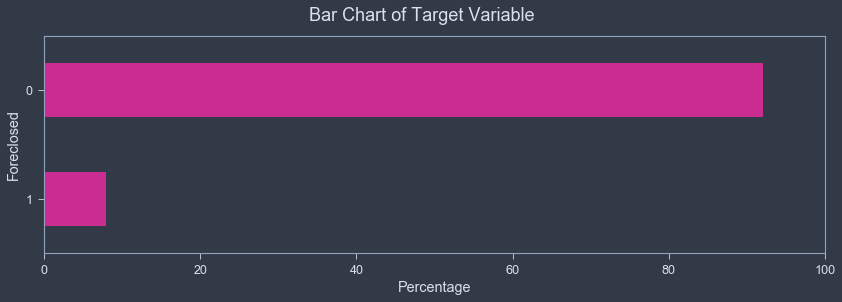

Frequency of Foreclosures
0    3552704
1     294702
Name: Foreclosed, dtype: int64

Percentage of Foreclosures
0    92
1     8
Name: Foreclosed, dtype: int32



In [11]:
# Target Variable with all data
target_values(df.loc[df['File Year'] >= 2006, 'Foreclosed'], data=True)

In [12]:
banks = ['Bank of America','Wells Fargo Bank','CitiMortgage',
         'JPMorgan Chase','GMAC Mortgage','SunTrust Mortgage',
         'AmTrust Bank','PNC Bank','Flagstar Bank']

## Group other banks
df['Bank'] = np.where((df['Bank'].apply(lambda x: x in banks)), df['Bank'], 'Other')
# Drop other banks
df = df.loc[df['Bank'] != 'Other',:]

df.loc[df['File Year'] >= 2006, 'Bank'].value_counts()

Bank of America      893184
JPMorgan Chase       422286
CitiMortgage         401316
Wells Fargo Bank     398466
GMAC Mortgage        245306
SunTrust Mortgage    214781
AmTrust Bank         138958
PNC Bank             132868
Flagstar Bank        115019
Name: Bank, dtype: int64

In [13]:
file_to_store = open("..\Data\df_load.pkl", "wb")
pickle.dump(df, file_to_store)
file_to_store.close()

In [14]:
file_to_open = open('..\Data\df_load.pkl', 'rb') 
df = pickle.load(file_to_open) 
file_to_open.close()


The number of features is:
30

The number of observations is:
2962184


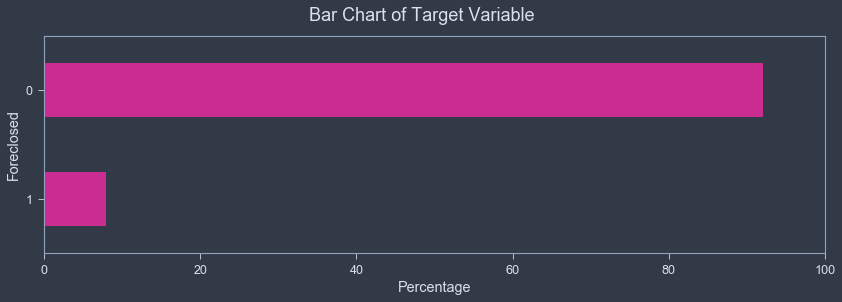

Frequency of Foreclosures
0    2719980
1     242204
Name: Foreclosed, dtype: int64

Percentage of Foreclosures
0    92
1     8
Name: Foreclosed, dtype: int32



In [15]:
df_crisis = df.loc[(df['File Year'] >= 2006) & (df['File Year'] <= 2008),:]
df_precrisis = df.loc[(df['File Year'] <= 2005),:]

# Create Target Variable with Merge
print('\nThe number of features is:\n', df_crisis.shape[1], sep='')
print('\nThe number of observations is:\n', df_crisis.shape[0], sep='')
target_values(df_crisis['Foreclosed'], data=True)

In [16]:
# Aggregate total loans by collapsing by Banks and Date
loan_lev = df.groupby(['Bank', 'File Year', 'File Quarter', 'Zip Code']) \
                      .agg({'Original Mortgage Amount': 'mean'}).reset_index()

# Previous years
Qtr = ['Q1', 'Q2', 'Q3', 'Q4']
Yr = [2006, 2007, 2008]
loan_lev_all_yrs = pd.DataFrame()
for yr in Yr:
    for qtr in Qtr:
        subset = loan_lev.loc[((loan_lev['File Quarter']==qtr) & (loan_lev['File Year']==yr)),:]
        subset_1yr = loan_lev.loc[((loan_lev['File Quarter']==qtr) & (loan_lev['File Year']==(yr-1))),:]
        subset_5yr = loan_lev.loc[((loan_lev['File Quarter']==qtr) & (loan_lev['File Year']==(yr-5))),:]
        loan_lev_stacks = pd.merge(subset, subset_1yr, on=['Bank', 'Zip Code'], 
                                   how='outer', suffixes=('', ' (1 Yr)'), copy=True)
        loan_lev_stacks = pd.merge(loan_lev_stacks, subset_5yr, on=['Bank', 'Zip Code'], 
                                   how='outer', suffixes=('', ' (5 Yr)'), copy=True)
        
        loan_lev_stacks['Loan Change (1 Year)'] = \
            loan_lev_stacks['Original Mortgage Amount'] - loan_lev_stacks['Original Mortgage Amount (1 Yr)']
        loan_lev_stacks['Loan Change (5 Years)'] = \
            loan_lev_stacks['Original Mortgage Amount'] - loan_lev_stacks['Original Mortgage Amount (5 Yr)']
        loan_lev_all_yrs = pd.concat([loan_lev_all_yrs, loan_lev_stacks], axis=0)

# Merge
drop_vars = ['File Year (1 Yr)', 'File Quarter (1 Yr)', 'Original Mortgage Amount (1 Yr)', 
             'File Year (5 Yr)', 'File Quarter (5 Yr)', 'Original Mortgage Amount (5 Yr)']
loan_lev_all_yrs = loan_lev_all_yrs.drop(labels=drop_vars, axis=1)
df = pd.merge(df_crisis, loan_lev_all_yrs, on=['Bank', 'Zip Code', 'File Year', 'File Quarter'], how='inner', copy=True)
df = df.drop(labels=['Original Mortgage Amount_y'], axis=1)
df = df.rename(columns={'Original Mortgage Amount_x': 'Original Mortgage Amount'})

# 1 Year change in total loans
print('Average change in 1 year: $', np.round(np.mean(df['Loan Change (1 Year)']),2))
# 5 year change in total loans
print('Average change in 5 years: $', np.round(np.mean(df['Loan Change (5 Years)']),2))

print('Shape:', df.shape)

Average change in 1 year: $ 11173.69
Average change in 5 years: $ 62673.54
Shape: (2962182, 32)


***

# ETL Median Household Income

ETL County-level median household income from U.S. Census

Aggregate on 3-digit zipcode

In [17]:
# Import zipcode median household income
income = pd.read_excel("..\Data\est07all.xls",
                       sheet_name = 'est07ALL', header = 2)
income = income[['Name', 'Median Household Income']]
income = income.rename(columns={'Name': 'County'})

# Import county zipcode crosswalk
crosswalk = pd.read_csv("..\Data\ZIP-COUNTY-FIPS_2017-06.csv",
                        header = 0)
crosswalk = crosswalk[['ZIP', 'COUNTYNAME', 'STCOUNTYFP']]
crosswalk = crosswalk.rename(columns={'ZIP': 'Zip Code', 'COUNTYNAME': 'County', 'STCOUNTYFP': 'FIPS'})
crosswalk['Zip Code'] = crosswalk['Zip Code'].astype(str)
crosswalk['Zip Code'] = crosswalk['Zip Code'].str.slice(start=0, stop=-2)
crosswalk['Zip Code'] = crosswalk['Zip Code'].astype(int)

# Merge
county_level = pd.merge(income, crosswalk, on='County', how='outer')
county_level.head(10)

,County,Median Household Income,Zip Code,FIPS
0,United States,50740.0,NaN,NaN
1,Alabama,40596.0,NaN,NaN
2,Autauga County,50375.0,360.0,1001.0
3,Autauga County,50375.0,360.0,1001.0
4,Autauga County,50375.0,360.0,1001.0
5,Autauga County,50375.0,360.0,1001.0
6,Autauga County,50375.0,367.0,1001.0
7,Autauga County,50375.0,367.0,1001.0
8,Autauga County,50375.0,360.0,1001.0
9,Autauga County,50375.0,360.0,1001.0


In [18]:
# Merge zipcode crosswalk with 
FIPS_merge = county_level[['FIPS', 'Zip Code']]
FIPS_merge = FIPS_merge.groupby('Zip Code').agg({'FIPS': 'first'})
income_merge = county_level[['Median Household Income', 'Zip Code']]
income_merge = income_merge.groupby('Zip Code').agg({'Median Household Income': 'mean'})
df = pd.merge(df, FIPS_merge, on='Zip Code', how='left')
df = pd.merge(df, income_merge, on='Zip Code', how='left')

df['Median Household Income'].describe()

count    2.962107e+06
mean     4.890533e+04
std      8.978163e+03
min      2.883194e+04
25%      4.327351e+04
50%      4.601738e+04
75%      5.366575e+04
max      1.016513e+05
Name: Median Household Income, dtype: float64

***

# ETL FRED Data

In [19]:
# State to Region Conversion
df = to_region(df, 'Property State')
df['Region'].value_counts()

South        1088142
West          794379
Midwest       609441
Northeast     470220
Name: Region, dtype: int64

In [20]:
# Household Financial Obligations as a percent of Disposable Personal Income (FODSP)
# Consumer Debt Service Payments as a Percent of Disposable Personal Income (CDSP)
# S&P/Case-Shiller U.S. National Home Price Index (CSUSHPINSA)
# Mortgage Debt Service Payments as a Percent of Disposable Personal Income  (MDSP)
# Monthly Supply of Houses in the United States (MSACSR)
# Homeowner Vacancy Rate for the United States (RHVRUSQ156N)
fred_df = ['FODSP', 'CDSP', 'CSUSHPINSA', 'MDSP', 'MSACSR']
fred_name = ['Household Financial Obligations', 'Consumer Debt Service Payment',
             'National Home Price Index', 'Mortgage Debt Service Payments', 'Monthly Supply of Houses']
fred_freq = ['qtr', 'qtr', 'yr', 'qtr', 'yr']

for i in range(len(fred_df)):
    fred_tmp = pd.read_csv('..\Data\FRED\\' + fred_df[i] + '.csv', header = 0)
    if fred_freq[i]=='qtr':
        df = fred_merge(fred_tmp, df, quarter=True, varname=fred_name[i])
    else: df = fred_merge(fred_tmp, df, quarter=False, varname=fred_name[i])

print('Shape:', df.shape)
display(df.tail())

Shape: (1893739, 45)


,Loan ID,Reported Period,Origination Channel,Bank,Original Interest Rate,Original Mortgage Amount,Original Loan Term,Original Date,First Payment,Original Loan-to-Value (LTV),Original Combined Loan-to-Value (CLTV),Single Borrower,Original Debt to Income Ratio,First Time Home Buyer,Loan Purpose,Property Type,Number of Units,Occupancy Type,Property State,Zip Code,Mortgage Insurance %,Zero Balance Code,Mortgage Insurance Type,Relocation Mortgage Indicator,Foreclosed,File Year,File Quarter,Month,Year,Credit Score,Loan Change (1 Year),Loan Change (5 Years),FIPS,Median Household Income,Region,Household Financial Obligations (Qtr),Household Financial Obligations (Yr),Consumer Debt Service Payment (Qtr),Consumer Debt Service Payment (Yr),National Home Price Index (Qtr),National Home Price Index (Yr),Mortgage Debt Service Payments (Qtr),Mortgage Debt Service Payments (Yr),Monthly Supply of Houses (Qtr),Monthly Supply of Houses (Yr)
1893734,6.539244e+11,72009,R,CitiMortgage,5.875,220000.0,360.0,12/2007,22008.0,70.0,70.0,1,NaN,N,1,CO,4.0,I,NM,880.0,0.0,0,1,N,0,2008,Q4,12,2007,747.0,48548.654244,34453.416149,35017.0,38642.482993,West,0.008014,0.026461,0.005504,0.015049,-0.038276,-0.05398,0.014897,0.036944,0.043478,0.476923
1893735,8.109028e+11,82012,R,CitiMortgage,5.875,191000.0,360.0,12/2007,22008.0,70.0,70.0,1,11.0,N,1,CO,1.0,I,NM,880.0,0.0,0,1,N,0,2008,Q4,12,2007,747.0,48548.654244,34453.416149,35017.0,38642.482993,West,0.008014,0.026461,0.005504,0.015049,-0.038276,-0.05398,0.014897,0.036944,0.043478,0.476923
1893736,8.379005e+11,72014,R,CitiMortgage,5.875,191000.0,360.0,12/2007,22008.0,70.0,70.0,1,NaN,N,1,CO,1.0,I,NM,880.0,0.0,0,1,N,0,2008,Q4,12,2007,747.0,48548.654244,34453.416149,35017.0,38642.482993,West,0.008014,0.026461,0.005504,0.015049,-0.038276,-0.05398,0.014897,0.036944,0.043478,0.476923
1893737,8.075838e+11,12012,R,CitiMortgage,6.375,197000.0,360.0,12/2007,12008.0,95.0,95.0,1,NaN,N,0,CO,1.0,S,FL,349.0,30.0,1,0,N,1,2008,Q4,12,2007,691.0,-22160.714286,40229.211087,12043.0,41440.193878,South,0.008014,0.026461,0.005504,0.015049,-0.038276,-0.05398,0.014897,0.036944,0.043478,0.476923
1893738,5.913012e+11,12015,R,CitiMortgage,6.875,72000.0,360.0,12/2007,22008.0,90.0,90.0,0,NaN,N,0,CO,1.0,I,MT,590.0,25.0,0,0,N,0,2008,Q4,12,2007,728.5,-18689.075630,20028.571429,30033.0,43344.583784,West,0.008014,0.026461,0.005504,0.015049,-0.038276,-0.05398,0.014897,0.036944,0.043478,0.476923


In [21]:
# Housing Inventory Estimate: Vacant Housing Units for Sale (ESALEUSQ176N)
# Homeownership Rate for the United States (RHORUSQ156N)
# Housing Inventory Estimate: Vacant Housing Units for Rent (ERENTUSQ176N)
# Rental Vacancy Rate for the United States (RRVRUSQ156N)
fred_df = ['ESALEUSQ176N', 'RHORUSQ156N', 'ERENTUSQ176N', 'RRVRUSQ156N']
fred_name = ['Vacant Housing Units for Sale', 'Homeownership Rate', 'Vacant Housing Units for Rent',
             'Rental Vacancy Rate']
fred_freq = ['qtr', 'qtr', 'qtr', 'qtr']
for i in range(len(fred_df)):
    sub = len(fred_df[i]) - 7
    fred_prefix= fred_df[i][0:sub]
    fred_suffix= fred_df[i][-5:]
    fred_tmp = {}
    for region in ['NE', 'SO', 'MW', 'WE']:
        fred_tmp[region] = pd.read_csv('..\Data\FRED\\' + fred_prefix + region + fred_suffix + '.csv', header = 0)
    if fred_freq[i]=='qtr':
        df = fred_merge_region(NE = fred_tmp['NE'], SO = fred_tmp['SO'], MW = fred_tmp['MW'], 
                               WE = fred_tmp['WE'], varname = fred_name[i], df_orig = df,
                               quarter=True)
    else:
        df = fred_merge_region(NE = fred_tmp['NE'], SO = fred_tmp['SO'], MW = fred_tmp['MW'], 
                               WE = fred_tmp['WE'], varname = fred_name[i], df_orig = df,
                               quarter=False)
        
print('Shape:', df.shape)
display(df.tail())

Shape: (1893727, 53)


,Loan ID,Reported Period,Origination Channel,Bank,Original Interest Rate,Original Mortgage Amount,Original Loan Term,Original Date,First Payment,Original Loan-to-Value (LTV),Original Combined Loan-to-Value (CLTV),Single Borrower,Original Debt to Income Ratio,First Time Home Buyer,Loan Purpose,Property Type,Number of Units,Occupancy Type,Property State,Zip Code,Mortgage Insurance %,Zero Balance Code,Mortgage Insurance Type,Relocation Mortgage Indicator,Foreclosed,File Year,File Quarter,Month,Year,Credit Score,Loan Change (1 Year),Loan Change (5 Years),FIPS,Median Household Income,Region,Household Financial Obligations (Qtr),Household Financial Obligations (Yr),Consumer Debt Service Payment (Qtr),Consumer Debt Service Payment (Yr),National Home Price Index (Qtr),National Home Price Index (Yr),Mortgage Debt Service Payments (Qtr),Mortgage Debt Service Payments (Yr),Monthly Supply of Houses (Qtr),Monthly Supply of Houses (Yr),Vacant Housing Units for Sale (Qtr),Vacant Housing Units for Sale (Yr),Homeownership Rate (Qtr),Homeownership Rate (Yr),Vacant Housing Units for Rent (Qtr),Vacant Housing Units for Rent (Yr),Rental Vacancy Rate (Qtr),Rental Vacancy Rate (Yr)
1893722,6.539244e+11,72009,R,CitiMortgage,5.875,220000.0,360.0,12/2007,22008.0,70.0,70.0,1,NaN,N,1,CO,4.0,I,NM,880.0,0.0,0,1,N,0,2008,Q4,12,2007,747.0,48548.654244,34453.416149,35017.0,38642.482993,West,0.008014,0.026461,0.005504,0.015049,-0.038276,-0.05398,0.014897,0.036944,0.043478,0.476923,0.036585,0.103896,-0.012598,-0.027907,0.018045,0.024206,0.000000,-0.028571
1893723,8.109028e+11,82012,R,CitiMortgage,5.875,191000.0,360.0,12/2007,22008.0,70.0,70.0,1,11.0,N,1,CO,1.0,I,NM,880.0,0.0,0,1,N,0,2008,Q4,12,2007,747.0,48548.654244,34453.416149,35017.0,38642.482993,West,0.008014,0.026461,0.005504,0.015049,-0.038276,-0.05398,0.014897,0.036944,0.043478,0.476923,0.036585,0.103896,-0.012598,-0.027907,0.018045,0.024206,0.000000,-0.028571
1893724,8.379005e+11,72014,R,CitiMortgage,5.875,191000.0,360.0,12/2007,22008.0,70.0,70.0,1,NaN,N,1,CO,1.0,I,NM,880.0,0.0,0,1,N,0,2008,Q4,12,2007,747.0,48548.654244,34453.416149,35017.0,38642.482993,West,0.008014,0.026461,0.005504,0.015049,-0.038276,-0.05398,0.014897,0.036944,0.043478,0.476923,0.036585,0.103896,-0.012598,-0.027907,0.018045,0.024206,0.000000,-0.028571
1893725,8.075838e+11,12012,R,CitiMortgage,6.375,197000.0,360.0,12/2007,12008.0,95.0,95.0,1,NaN,N,0,CO,1.0,S,FL,349.0,30.0,1,0,N,1,2008,Q4,12,2007,691.0,-22160.714286,40229.211087,12043.0,41440.193878,South,0.008014,0.026461,0.005504,0.015049,-0.038276,-0.05398,0.014897,0.036944,0.043478,0.476923,-0.057421,-0.034406,-0.001427,-0.011299,0.025015,0.030409,0.016529,-0.008065
1893726,5.913012e+11,12015,R,CitiMortgage,6.875,72000.0,360.0,12/2007,22008.0,90.0,90.0,0,NaN,N,0,CO,1.0,I,MT,590.0,25.0,0,0,N,0,2008,Q4,12,2007,728.5,-18689.075630,20028.571429,30033.0,43344.583784,West,0.008014,0.026461,0.005504,0.015049,-0.038276,-0.05398,0.014897,0.036944,0.043478,0.476923,0.036585,0.103896,-0.012598,-0.027907,0.018045,0.024206,0.000000,-0.028571


***

# ETL FDIC Data

In [22]:
# use pandas to construct a list of quarterly dates
present = '20081231'
datetimes = pd.date_range('19930331', end=present, freq='Q')

# get a list of zip files over which to iterate
zip_files = glob.glob('..\Data\FDIC\*.zip')

# only want to return a subset of cols
used_columns = ['name', 'repdte', 'asset', 'lnlsnet', 'liab', 'dep', 'eqtot', 'numemp']
used_dtypes = {'name': str, 'repdte': object, 'asset': float,
               'lnlsnet': float, 'liab': float, 'eqtot': float, 'dep': float, 'numemp': float}

# create a container for the individual dataframes
dataframes = []

for zip_file in zip_files:

    tmp_buffer = zipfile.ZipFile(zip_file)
    
    # want to work with the assets and liabilities file
    tmp_file = tmp_buffer.namelist()[5]
    
    tmp_dataframe = pd.read_csv(tmp_buffer.open(tmp_file),
                                error_bad_lines=False,  # skips the mangled obs
                                usecols=used_columns,
                                dtype=used_dtypes,
                                parse_dates=True)
    
    dataframes.append(tmp_dataframe)

# concatenate the quarterly dataframes into a single data frame
fdic = pd.concat(dataframes)

# convert units from thousands to billions of USD
fdic[['asset', 'lnlsnet', 'liab', 'dep', 'eqtot']] /= 1e6

# convert units from nummber of people to thousands of people
fdic['numemp'] /= 1e3

# Map similar names to bank
fdic = grep_bank_groupings(fdic, Bank = 'name')
## Group other banks
fdic['Bank'] = np.where(fdic['Bank'].isnull(), 'Other', fdic['Bank'])

# Drop name
fdic = fdic.drop(labels=['name'], axis=1)

# Convert to panel
fdic = fdic.groupby(['Bank', 'repdte']).sum()
fdic = fdic.reset_index(drop=False)

# Fill monthly data
fdic = fdic_on_month(fdic)
fdic = fdic.groupby(['Bank', 'Original Date']).sum()

print('Shape:', fdic.shape)
display(fdic.tail())

Shape: (1635, 6)


numemp       asset     lnlsnet        liab  \
Bank             Original Date                                                
Wells Fargo Bank 12/2004        114.952  389.868210  297.086582  352.104163   
                 12/2005        122.680  427.379337  312.918048  389.365082   
                 12/2006        128.696  419.646642  303.835403  377.053897   
                 12/2007        129.795  493.179905  327.000917  448.762011   
                 12/2008        143.463  591.056502  389.900834  545.270229   

                                       dep      eqtot  
Bank             Original Date                         
Wells Fargo Bank 12/2004        286.779202  37.764047  
                 12/2005        326.400436  38.014255  
                 12/2006        322.053559  42.592745  
                 12/2007        352.821482  44.417894  
                 12/2008        363.272892  45.786273

In [23]:
# compute the by quarter totals for each measure
quarter_totals = fdic.groupby(['Original Date']).sum()

# compute the base quarter totals for each measure
totals_base_qtr = quarter_totals.iloc[0,:]

def janicki_prescott_norm(item):
    """
    In order to make sure results are comparable across years, I follow 
    Janicki and Prescott (2006) and deflate and re-scale each measure of bank 
    size by dividing by banking sector totals relative to some base quarter. 
    Specifically, let :math:`S_{i,t}^{raw}` denote the raw size of bank :math:`i`
    in year :math:`t` based on one of the six size measures detailed above. The 
    normalized size of bank :math:`i` relative to the base quarter is defined as
    follows:
             
    .. math::
    
        S_{i,t}^{norm} = \frac{S_{i,t}^{raw}}{\sum_{j}S_{j,t}^{raw}}\sum_{j}S_{i,base}^{raw}
    
    where :math:\sum_{j}S_{j,t}^{raw}` is the banking sector total of some size 
    measure in year :math:`t` (i.e., total banking sector assets in year :math:`t`), 
    and :math:`\sum_{j}S_{j,base}^{raw}` is the banking sector total of the same
    size measure in the base quarter.
    
    """
    return (fdic[column] / quarter_totals[column]) * totals_base_qtr[column]

# apply the Janicki and Prescott (2006) normalized size measure 
for column in fdic.columns:
    fdic[column] = janicki_prescott_norm(column)

# Period change
fdic = fdic.reset_index(drop=False)
for col in ['asset', 'lnlsnet', 'liab', 'dep', 'eqtot']:
    fdic[[str(col.title() + ' (5 Yr)')]] = fdic[[col]].pct_change(60)
    fdic[[str(col.title() + ' (1 Yr)')]] = fdic[[col]].pct_change(12)

# Drop total values
fdic = fdic.drop(labels=['asset', 'lnlsnet', 'liab', 'dep', 'eqtot'], axis=1)

# Rename number of employees
fdic = fdic.rename(columns={'numemp': 'Number of Employees'})

# Regroup
fdic = fdic.groupby(['Bank', 'Original Date']).sum()
display(fdic.tail())

Number of Employees  Asset (5 Yr)  \
Bank             Original Date                                      
Wells Fargo Bank 12/2004                  96.881955     -0.074947   
                 12/2005                 100.822385      2.655365   
                 12/2006                 103.074260      2.429248   
                 12/2007                 103.561459      2.772598   
                 12/2008                 117.832773      1.049528   

                                Asset (1 Yr)  Lnlsnet (5 Yr)  Lnlsnet (1 Yr)  \
Bank             Original Date                                                 
Wells Fargo Bank 12/2004           -0.094182        0.020770       -0.027877   
                 12/2005            2.653762        3.130368        3.203522   
                 12/2006            2.406376        2.713141        2.661428   
                 12/2007            2.768176        2.638637        2.563777   
                 12/2008            1.056944        1.367707        1.451084   

                                Liab (5 Yr)  Liab (1 Yr)  Dep (5 Yr)  \
Bank             Original Date                                         
Wells Fargo Bank 12/2004          -0.079378    -0.103549    0.019045   
                 12/2005           2.739007     2.744499    2.840498   
                 12/2006           2.474868     2.424663    2.642873   
                 12/2007           2.872981     2.864676    2.948190   
                 12/2008           1.222794     1.214321    0.813550   

                                Dep (1 Yr)  Eqtot (5 Yr)  Eqtot (1 Yr)  
Bank             Original Date                                          
Wells Fargo Bank 12/2004          0.086315     -0.023030      0.024646  
                 12/2005          2.823646      1.908322      1.851335  
                 12/2006          2.508669      1.993109      2.237497  
                 12/2007          3.048262      1.910454      1.935036  
                 12/2008          0.856408      0.011285      0.059227

In [24]:
# Merge
df = pd.merge(df, fdic, on=['Bank', 'Original Date'], how='left')
    
print('Shape:', df.shape)
display(df.tail())

Shape: (1893727, 64)


,Loan ID,Reported Period,Origination Channel,Bank,Original Interest Rate,Original Mortgage Amount,Original Loan Term,Original Date,First Payment,Original Loan-to-Value (LTV),Original Combined Loan-to-Value (CLTV),Single Borrower,Original Debt to Income Ratio,First Time Home Buyer,Loan Purpose,Property Type,Number of Units,Occupancy Type,Property State,Zip Code,Mortgage Insurance %,Zero Balance Code,Mortgage Insurance Type,Relocation Mortgage Indicator,Foreclosed,File Year,File Quarter,Month,Year,Credit Score,Loan Change (1 Year),Loan Change (5 Years),FIPS,Median Household Income,Region,Household Financial Obligations (Qtr),Household Financial Obligations (Yr),Consumer Debt Service Payment (Qtr),Consumer Debt Service Payment (Yr),National Home Price Index (Qtr),National Home Price Index (Yr),Mortgage Debt Service Payments (Qtr),Mortgage Debt Service Payments (Yr),Monthly Supply of Houses (Qtr),Monthly Supply of Houses (Yr),Vacant Housing Units for Sale (Qtr),Vacant Housing Units for Sale (Yr),Homeownership Rate (Qtr),Homeownership Rate (Yr),Vacant Housing Units for Rent (Qtr),Vacant Housing Units for Rent (Yr),Rental Vacancy Rate (Qtr),Rental Vacancy Rate (Yr),Number of Employees,Asset (5 Yr),Asset (1 Yr),Lnlsnet (5 Yr),Lnlsnet (1 Yr),Liab (5 Yr),Liab (1 Yr),Dep (5 Yr),Dep (1 Yr),Eqtot (5 Yr),Eqtot (1 Yr)
1893722,6.539244e+11,72009,R,CitiMortgage,5.875,220000.0,360.0,12/2007,22008.0,70.0,70.0,1,NaN,N,1,CO,4.0,I,NM,880.0,0.0,0,1,N,0,2008,Q4,12,2007,747.0,48548.654244,34453.416149,35017.0,38642.482993,West,0.008014,0.026461,0.005504,0.015049,-0.038276,-0.05398,0.014897,0.036944,0.043478,0.476923,0.036585,0.103896,-0.012598,-0.027907,0.018045,0.024206,0.000000,-0.028571,196.286845,1.063507,1.058739,0.76037,0.705916,1.094195,1.084696,1.135336,1.129147,0.812732,0.859915
1893723,8.109028e+11,82012,R,CitiMortgage,5.875,191000.0,360.0,12/2007,22008.0,70.0,70.0,1,11.0,N,1,CO,1.0,I,NM,880.0,0.0,0,1,N,0,2008,Q4,12,2007,747.0,48548.654244,34453.416149,35017.0,38642.482993,West,0.008014,0.026461,0.005504,0.015049,-0.038276,-0.05398,0.014897,0.036944,0.043478,0.476923,0.036585,0.103896,-0.012598,-0.027907,0.018045,0.024206,0.000000,-0.028571,196.286845,1.063507,1.058739,0.76037,0.705916,1.094195,1.084696,1.135336,1.129147,0.812732,0.859915
1893724,8.379005e+11,72014,R,CitiMortgage,5.875,191000.0,360.0,12/2007,22008.0,70.0,70.0,1,NaN,N,1,CO,1.0,I,NM,880.0,0.0,0,1,N,0,2008,Q4,12,2007,747.0,48548.654244,34453.416149,35017.0,38642.482993,West,0.008014,0.026461,0.005504,0.015049,-0.038276,-0.05398,0.014897,0.036944,0.043478,0.476923,0.036585,0.103896,-0.012598,-0.027907,0.018045,0.024206,0.000000,-0.028571,196.286845,1.063507,1.058739,0.76037,0.705916,1.094195,1.084696,1.135336,1.129147,0.812732,0.859915
1893725,8.075838e+11,12012,R,CitiMortgage,6.375,197000.0,360.0,12/2007,12008.0,95.0,95.0,1,NaN,N,0,CO,1.0,S,FL,349.0,30.0,1,0,N,1,2008,Q4,12,2007,691.0,-22160.714286,40229.211087,12043.0,41440.193878,South,0.008014,0.026461,0.005504,0.015049,-0.038276,-0.05398,0.014897,0.036944,0.043478,0.476923,-0.057421,-0.034406,-0.001427,-0.011299,0.025015,0.030409,0.016529,-0.008065,196.286845,1.063507,1.058739,0.76037,0.705916,1.094195,1.084696,1.135336,1.129147,0.812732,0.859915
1893726,5.913012e+11,12015,R,CitiMortgage,6.875,72000.0,360.0,12/2007,22008.0,90.0,90.0,0,NaN,N,0,CO,1.0,I,MT,590.0,25.0,0,0,N,0,2008,Q4,12,2007,728.5,-18689.075630,20028.571429,30033.0,43344.583784,West,0.008014,0.026461,0.005504,0.015049,-0.038276,-0.05398,0.014897,0.036944,0.043478,0.476923,0.036585,0.103896,-0.012598,-0.027907,0.018045,0.024206,0.000000,-0.028571,196.286845,1.063507,1.058739,0.76037,0.705916,1.094195,1.084696,1.135336,1.129147,0.812732,0.859915


***

# Final Data Missing Summary

In [25]:
# Missing
print( (df.isna().sum() / df.shape[0] * 100).round(2) )

Loan ID                   0.00
Reported Period           0.00
Origination Channel       0.00
Bank                      0.00
Original Interest Rate    0.00
                          ... 
Liab (1 Yr)               2.83
Dep (5 Yr)                2.83
Dep (1 Yr)                2.83
Eqtot (5 Yr)              2.83
Eqtot (1 Yr)              2.83
Length: 64, dtype: float64


***

# Save Data File

In [26]:
file_to_store = open("..\Data\Pickle\df.pkl", "wb")
pickle.dump(df, file_to_store)
file_to_store.close()

***